# **C3 - Laboratorio Reconocimiento de patrones II**

**Autores:**  

* Esteban Rodriguez
* Daniel Velasquez
* Santiago Niño

Ciencias de la computación e Inteligencia Artificial


Vida Artificial

# __Bibliotecas usadas__

In [269]:
try:
    import IPython
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    import os
    import requests
    import time
    import platform
    import psutil
    from PIL import Image
    from IPython.display import HTML
    from matplotlib.animation import FuncAnimation
    from IPython import display

except ImportError:
    %pip install IPython
    %pip install numpy
    %pip install matplotlib
    %pip install requests
    %pip install psutil
    %pip install PIL
    
    import numpy as np
    import random
    import matplotlib.pyplot as plt
    import os
    import requests
    import time
    import platform
    import psutil
    from PIL import Image
    from IPython.display import HTML
    from matplotlib.animation import FuncAnimation
    from IPython import display

In [270]:
#import numpy as np
#import random
#import matplotlib.pyplot as plt
#import os
#import requests

#import time
#import platform
#import psutil

#from PIL import Image
#from IPython.display import HTML
#from matplotlib.animation import FuncAnimation
#from IPython import display

# Enunciado

Tome una foto de todos los miembros del grupo. La foto debe tener mínimo una resolución HD (720 X 1280 pixeles).

- Convierta la imagen en un arreglo unidimensional (Considere los 3 canales)

- Utilice su implementación de GA para generar la imagen y realice una animación que permita ver el proceso de generación del patrón.

- En 3 diapositivas, incluya:

1. Gráfica de fitness generada durante el proceso de entrenamiento. Tiempo de ejecución y características de la máquina donde se ejecutó el experimento.

2. Los diferentes operadores genéticos utilizados.

3. Mencione si realizó ajustes sobre hiperparámetros como la probabilidad de mutación, porcentaje de elitismo, criterio de parada etc.

# Clases

## Constantes

In [271]:
class constantes:
    num_generaciones = 200
    factor = 25
    prob_cruce = 0.97
    prob_mutacion = 0.1
    porc_elitismo = 0

## Individuo

In [272]:
class individuo2:
    def __init__(self, cromosoma, fitness):
        self._cromosoma = cromosoma
        self.fitness = fitness
        self.value = self._calculate_fitness(self._cromosoma)

    def _calculate_fitness(self, value):
        return self.fitness(value)

    @property
    def cromosoma(self):
        return self._cromosoma

    @cromosoma.setter
    def cromosoma(self, value):
        self._cromosoma = value
        self.value = self._calculate_fitness(value)

In [273]:
class individuo:
    def __init__(self, cromosoma, fitness):
        self.cromosoma = cromosoma
        self.fitness = fitness
        #self.value = self._calculate_fitness(self._cromosoma)
        self.value = fitness

    def _calculate_fitness(self, value):
        return self.fitness(value)

    #@property
    #def cromosoma(self):
    #    return self._cromosoma

    #@cromosoma.setter
    #def cromosoma(self, value):
    #    self._cromosoma = value
    #    self.value = self._calculate_fitness(value)

## OperadorGenetico

In [274]:
class OperadorGenetico:
    def __init__(self, poblacion, tipo, prob_cruce=0.5, prob_mutacion=0.5):
      self.poblacion = poblacion
      self.tipo = tipo
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion

    def opcion(self):
      #metodos seleccion
      if self.tipo == 'ruleta' or self.tipo == 'estocastico' or self.tipo == 'ranking' or self.tipo == 'torneo':
        return self.seleccion()
      #metodos cruce
      if self.tipo == 'basado_punto' or self.tipo == 'basado_dos_puntos' or self.tipo == 'uniforme':
        return self.cruce()
      #metodos mutacion
      if self.tipo == 'flit_bit' or self.tipo == 'inversion_mutation' or self.tipo == 'inversion_mutation' or self.tipo == 'scramble':
        return self.mutacion()

    def seleccion(self):
      if self.tipo == "ruleta":
        next_generation = []
        total_fitness = np.sum([indiv.value for indiv in self.poblacion])
        probabilidades = [indiv.value / total_fitness for indiv in self.poblacion]
        while len(next_generation) <= len(self.poblacion):
            individuo_ruleta = np.random.choice(a=self.poblacion, size=1, replace=True, p=probabilidades)
            next_generation.append(individuo_ruleta[0])
        return next_generation

      elif self.tipo == "estocastico":
        next_generation = []
        if len(self.population) == 1:
            return self.population[0]
        total_fitness = np.sum([indiv.value for indiv in self.poblacion])
        probabilidades = [indiv.value / total_fitness for indiv in self.poblacion]
        while len(next_generation) <= len(self.poblacion) - 1:
            if sum(probabilidades) < 1:
                probabilidades[-1] += 1 - sum(probabilidades)
            r = np.random.random()
            c = probabilidades[0]
            i = 0
            while c < r:
                i += 1
                c += probabilidades[i]
            next_generation.append(self.poblacion[i])
        return next_generation

      elif self.tipo == "ranking":
        next_generation = []
        ordenando = np.argsort([indiv.value for indiv in self.poblacion]) + 1
        rangos = np.argsort(ordenando) + 1
        seleccion_rango = rangos / np.sum(rangos)
        while len(next_generation) <= len(self.poblacion):
            #print(len(next_generation), " - " , len(self.poblacion))
            individuo_rango = np.random.choice(a=self.poblacion, size=1, replace=True, p=list(seleccion_rango))
            next_generation.append(individuo_rango[0])
        return next_generation

      elif self.tipo == "torneo":
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            for individuo in self.poblacion:
                participantes = np.random.choice(a=self.poblacion, size=3, replace=True)
                campeon = max(participantes, key=lambda ind: individuo.value)
                next_generation.append(campeon)
        return next_generation

    def cruce(self):
      if self.tipo == "basado_punto":
        next_generation = []
        while len(next_generation) < len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            if x == y:
                while x == y:
                    y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            n = np.random.randint(len(padre1))
            aux = np.array([padre1[:n]])
            aux2 = np.array([padre2[:n]])
            auxpadre1 = np.array([padre1[n:]])
            auxpadre2 = np.array([padre2[n:]])
            next_generation.append(individuo(np.concatenate((aux, auxpadre2), axis=None), p1.fitness))
            next_generation.append(individuo(np.concatenate((aux2, auxpadre1), axis=None), p2.fitness))
        return next_generation

      if self.tipo == 'basado_dos_puntos':
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            n = np.random.randint(len(padre1) - 1)
            i = np.random.randint(n, len(padre1))
            if (n == i):
                while (n == i):
                    i = np.random.randint(n, len(padre1))
            aux1 = np.array([padre1[n:i]])
            aux2 = np.array([padre2[n:i]])
            b1_left = np.array([padre1[:n]])
            b2_left = np.array([padre2[:n]])
            b1_right = np.array([padre1[i:]])
            b2_right = np.array([padre2[i:]])
            next_generation.append(individuo(np.concatenate((b1_left, aux2, b1_right), axis=None), p1.fitness))
            next_generation.append(individuo(np.concatenate((b2_left, aux1, b2_right), axis=None), p2.fitness))
        return next_generation

      if self.tipo == 'uniforme':
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            hijo = np.array([])
            for i in range(len(padre1)):
                n = np.random.randint(2)
                if (n == 0):
                    hijo = np.concatenate((hijo, padre1[i]), axis=None)
                if (n == 1):
                    hijo = np.concatenate((hijo, padre2[i]), axis=None)
            next_generation.append(individuo(hijo, p1.fitness))
        return next_generation

    def mutacion(self):
      if self.tipo == 'flit_bit':
        for individuo in self.poblacion:
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(0, len(individuo.cromosoma) - 1)
            current_bit = individuo.cromosoma[n]
            new_bit = 1 if current_bit == 0 else 0
            new_cromosoma = individuo.cromosoma
            new_cromosoma[n] = new_bit
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'swap_mutation':
        for individuo in self.poblacion:
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n_1 = np.random.randint(0, len(individuo.cromosoma) - 1)
            n_2 = np.random.randint(0, len(individuo.cromosoma) - 1)
            n_1_bit = individuo.cromosoma[n_1]
            n_2_bit = individuo.cromosoma[n_2]
            new_cromosoma = individuo.cromosoma
            new_cromosoma[n_1_bit] = n_2_bit
            new_cromosoma[n_2_bit] = n_1_bit
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'inversion_mutation':
        for index, individuo in enumerate(self.poblacion):
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(1, len(individuo.cromosoma) - 1)
            part_individuo = individuo.cromosoma[:n]
            list_invert = individuo.cromosoma[n:]
            list_invert = list_invert[::-1]
            new_cromosoma = np.concatenate((part_individuo, list_invert), axis=0)
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'scramble':
        for index, individuo in enumerate(self.poblacion):
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(1, len(individuo.cromosoma) - 1)
            part_individuo = individuo.cromosoma[:n]
            list_invert = individuo.cromosoma[n:]
            np.random.shuffle(list_invert)
            new_cromosoma = np.concatenate((part_individuo, list_invert), axis=0)
            individuo.cromosoma = new_cromosoma
        return self.poblacion

## Analisis Descriptivo

In [275]:
class AnalisisDescriptivo:
    def promedio(poblacion):
      my_array = np.array([])
      for individuo in poblacion.list_individuos:
        my_array = np.append(my_array, individuo.fitness)
      return np.mean(my_array)

    def tiempo_ejecucion(inicio_tiempo):
      #inicio_tiempo = time.time()  # Tiempo inicial
      fin_tiempo = time.time()  # Tiempo final
      tiempo_ejec = fin_tiempo - inicio_tiempo  # Calcular el tiempo de ejecución
      return tiempo_ejec

    def total_tiempo_ejecucion(inicio_tiempo, tiempos):
      tiempo_ejec = tiempos[-1] - inicio_tiempo
      print("\nTiempo total de ejecucion:")
      print(f" {tiempo_ejec} segundos")
      print(f" {tiempo_ejec / 60} minutos")

    def extraer_datos_pc():
      # Obtener información del sistema
      sistema = platform.system()
      version = platform.version()
      arquitectura = platform.architecture()
      procesador = platform.processor()
      # Obtener información sobre la memoria
      memoria = psutil.virtual_memory()

      # Imprimir la información
      print("\nInformación del computador:")
      print(f" Sistema: {sistema}")
      print(f" Versión: {version}")
      print(f" Arquitectura: {arquitectura}")
      print(f" Procesador: {procesador}")
      print(f" Memoria Total: {memoria.total} bytes")
      print(f" Memoria Disponible: {memoria.available} bytes")
      print(f" Porcentaje de Uso de Memoria: {memoria.percent}%")

    def mostrarAnalisis(poblacion):
      my_array = [indi.value for indi in poblacion]

      print("Datos estadisticos:")
      print(" Media:", np.mean(my_array))
      print(" Mediana:", np.median(my_array))
      print(" Mínimo:", np.min(my_array))
      print(" Máximo:", np.max(my_array))
      print(" Desviación estándar:", np.std(my_array))
      print(" Varianza:", np.var(my_array))

    def mejor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value > indi.value:
              indi = i
      return indi

    def peor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value < indi.value:
              indi = i
      return indi

    def promedio_por_generacion(poblacion):
      return np.average([inv.value for inv in poblacion])


## Visualizacion

In [276]:
class Visualizacion():
  def fitnessPromVSgeneracion(prom_por_generacion):
    plt.title("Promedio fitness por generacion")
    plt.plot(range(len(prom_por_generacion)), prom_por_generacion)
    plt.show()
    #plt.savefig('Grafica_fitnessVSgeneracion.png')

  def tiempoVSgeneracion(tiempos):
    plt.title("Tiempo (seg) vs Generacion")
    plt.plot(range(len(tiempos)), tiempos)
    plt.show()
    #plt.savefig('Grafica_tiempoVSgeneracion.png')

  #def diagramaCaja(prom_por_generacion):
  #  plt.title("Fitness por generacion")
  #  plt.boxplot(prom_por_generacion)
  #  plt.show()

  #def mejores_fitness(best_fitness_generation):
  #  plt.title("Mejores fitness por generacion")
  #  plt.plot(range(len(best_fitness_generation)), best_fitness_generation)
  #  plt.show()

  #def peores_fitness(worse_fitness_generation):
  #  plt.title("Peores fitness por generacion")
  #  plt.plot(range(len(worse_fitness_generation)), worse_fitness_generation)
  #  plt.show()

## Algoritmo Genetico

In [277]:
class AlgGenetico:
    def __init__(self, poblacion, num_generaciones, seleccion="ruleta", cruce="basado_punto", mutacion="flit_bit",
                 prob_cruce=constantes.prob_cruce, prob_mutacion=constantes.prob_mutacion, distribucion_elite=constantes.porc_elitismo):
      self.poblacion = poblacion
      self.num_generaciones = num_generaciones
      self.seleccion = seleccion
      self.cruce = cruce
      self.mutacion = mutacion
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion
      self.distribucion_elite = distribucion_elite
      self.promXgeneracion = []
      self.tiempos = []
      self.inicio_tiempo = None
      #self.mejorFitnessXgeneracion = []
      self.mejorIndividuoXgeneracion = []
      #self.peorFitnessXgeneracion = []

    def mejor_individuo(self, poblacion):
      return AnalisisDescriptivo.mejor_individuo(poblacion)

    #def peor_individuo(self, poblacion):
    #  return AnalisisDescriptivo.peor_individuo(poblacion)

    def extraer_tiempo(self):
      return AnalisisDescriptivo.tiempo_ejecucion(self.inicio_tiempo)

    def seleccion_top(self, poblacion):
      sort_poblacion = sorted(poblacion, key=lambda x: x.value, reverse=True)
      elite_size = int(len(poblacion) * self.distribution_elite)
      elite = sort_poblacion[:elite_size]
      otros = sort_poblacion[elite_size:]
      return elite, otros

    def actualizar_listas(self, poblacionActual):
      self.promXgeneracion.append( AnalisisDescriptivo.promedio_por_generacion(poblacionActual) )
      self.tiempos.append(self.extraer_tiempo())
      self.mejorIndividuoXgeneracion.append( self.mejor_individuo(poblacionActual).cromosoma )
      #mejor_indi = self.mejor_individuo(poblacionActual)
      #self.mejorIndividuoXgeneracion.append( mejor_indi.cromosoma )

      #self.mejorFitnessXgeneracion.append( mejor_indi.value )
      #self.peorFitnessXgeneracion.append( self.peor_individuo(poblacionActual).value )

    def desarrollo_generaciones(self):
      poblacionActual, elite = self.poblacion, []
      # Establece el tiempo inicial
      self.inicio_tiempo = time.time()
      for i in range(self.num_generaciones):
          if self.distribucion_elite > 0:
              elite, otros = self.seleccion_top(poblacionActual)
              poblacionActual = otros
              elite = elite
          #Seleccion
          seleccionPob = OperadorGenetico(poblacionActual, tipo=self.seleccion).opcion()
          #print("Seleccionado")
          #Cruce
          crucePob = OperadorGenetico(seleccionPob, tipo=self.cruce, prob_cruce=self.prob_cruce).opcion()
          #print("Cruzado")
          #Mutacion
          mutacionPob = OperadorGenetico(crucePob, tipo=self.mutacion, prob_cruce=0.5 ,prob_mutacion=self.prob_mutacion).opcion()
          #print("Mutado")
          if len(elite) > 0:
              poblacionActual = [*mutacionPob,*elite]
          else:
              poblacionActual = mutacionPob
          self.actualizar_listas(poblacionActual)
      self.poblacion = poblacionActual

    def analisis_est(self):
      AnalisisDescriptivo.mostrarAnalisis(self.poblacion)
      AnalisisDescriptivo.extraer_datos_pc()
      AnalisisDescriptivo.total_tiempo_ejecucion(self.inicio_tiempo, self.tiempos)

    def diagramas(self):
      Visualizacion.fitnessPromVSgeneracion(self.promXgeneracion)
      Visualizacion.tiempoVSgeneracion(self.tiempos)

## Main

In [278]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [279]:
def desordenar_valores_imagen(array):
    # Desordenar los valores
    valores_desordenados = np.random.permutation(array)
    return valores_desordenados

In [280]:
def fitness2(array_base, array_init):
    return np.sqrt(np.sum((np.array(array_base) - np.array(array_init)) ** 2))

In [281]:
def pob_init(array_base):
    #poblacion_inicial = [individuo(desordenar_valores_imagen(array_base), fitness) for _ in range(1000)]
    #return poblacion_inicial
    poblacion_inicial = []
    pob = desordenar_valores_imagen(array_base)
    #for i in range(len(pob)):
    #    poblacion_inicial.append(individuo([pob[i], pob[i+1], pob[i+2]], fitness2( [array_base[i],array_base[i+1],array_base[i+2]] , [pob[i],pob[i+1],pob[i+2]] )))
    #    i = i+2
    #    print(i)
    
    #for i in range(0, len(pob) - 2, 3):
    #    poblacion_inicial.append(individuo([pob[i], pob[i+1], pob[i+2]], fitness2([array_base[i], array_base[i+1], array_base[i+2]], [pob[i], pob[i+1], pob[i+2]])))
        #print(i)
    for i in range(int(len(pob)/3)):
        poblacion_inicial.append(individuo([pob[i], pob[i+1], pob[i+2]], fitness2( [array_base[i],array_base[i+1],array_base[i+2]] , [pob[i],pob[i+1],pob[i+2]] )))
        i = i+3

    return poblacion_inicial

In [282]:
def obt_array_matrix(img, factor):
  # Convertir la imagen a un arreglo NumPy
  matrizExp = np.array(img)
  # Convertir el arreglo a un arreglo unidimensional
  arrayExp = matrizExp.flatten() / factor
  return matrizExp, arrayExp

In [283]:
def obtener_el_mejor(exp, matrizExp):
  best_individuo = exp.poblacion[0]
  for indi in exp.poblacion:
      if indi.value > best_individuo.value:
          best_individuo = indi
  imgResultExp = best_individuo.cromosoma.reshape(matrizExp.shape)
  return imgResultExp

In [284]:
def animation_result(matrizExp, exp, frame, factor):
    matrix = np.random.randint(256, size=matrizExp.shape)
    fig, ax = plt.subplots()
    img = ax.imshow(matrix, cmap='binary')
    def update(i):
        matrix = (exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape) * factor) / 255.0
        img.set_data(matrix)
        return img,
    ani = FuncAnimation(fig, update, frames=frame, interval=100, blit=True)
    return ani

In [285]:
#def obtenerImg(exp1):
    #result = []
    #for i in exp1.poblacion:
    #    result.append(i.cromosoma[0])
    #    result.append(i.cromosoma[1])
    #    result.append(i.cromosoma[2])
    #return np.array(result)

In [286]:
def animation_result2(matrizExp, exp, frame, factor):
    matrix = np.random.randint(256, size=matrizExp.shape)
    fig, ax = plt.subplots()
    img = ax.imshow(matrix, cmap='binary')
    def update(i):
        matrix = (exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape) * factor) / 255.0
        img.set_data(matrix)
        return img,
    ani = FuncAnimation(fig, update, frames=frame, interval=100, blit=True)
    return ani

# Imagenes

Obtencion de las imagenes

In [287]:
#carpeta = "C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatronesII\\archivos2"

# Verificar si la carpeta ya existe
#if not os.path.exists(carpeta):
    # Si no existe, la creamos
#    os.mkdir(carpeta)
#    url_img_1 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/imagen_grupo.jpg'
#    img_1 = Image.open(requests.get(url_img_1, stream=True).raw)
#    img_1.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatronesII\\archivos2\\img_original.jpg')

    # Dimensiones originales
#    ancho_original, alto_original = img_1.size
    # Nuevo ancho deseado
#    nuevo_ancho = 1080
    # Calcula el nuevo alto manteniendo la proporción original
#    nuevo_alto = int((nuevo_ancho / ancho_original) * alto_original)
    # Redimensiona la imagen
#    img_1 = img_1.resize((nuevo_ancho, nuevo_alto))

    # Guarda la imagen redimensionada
#    img_1.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatronesII\\archivos2\\img_redimensionada.jpg')

# Listar el contenido actual del directorio
#print("Contenido de la carpeta imagenes:")
#print(os.listdir("C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatronesII\\archivos2"))

In [288]:
url_img_1 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/Paisaje.png'
img_1 = Image.open(requests.get(url_img_1, stream=True).raw)


    # Dimensiones originales
#ancho_original, alto_original = img_1.size
    # Nuevo ancho deseado
#nuevo_ancho = 1080
    # Calcula el nuevo alto manteniendo la proporción original
#nuevo_alto = int((nuevo_ancho / ancho_original) * alto_original)
    # Redimensiona la imagen
#img_1 = img_1.resize((nuevo_ancho, nuevo_alto))

Imagen 1

In [289]:
np_img1 = np.array(img_1)
np_img1.shape

(12, 19, 3)

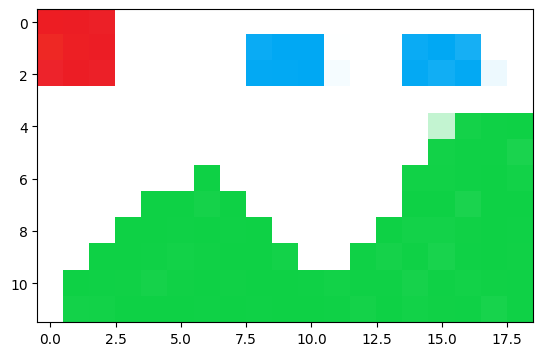

In [290]:
plt.imshow(np_img1, cmap='gray')

# Pruebas

## Primer experimento

In [291]:
# Factor de escala
factor = constantes.factor
# Numero de generaciones
generaciones = constantes.num_generaciones

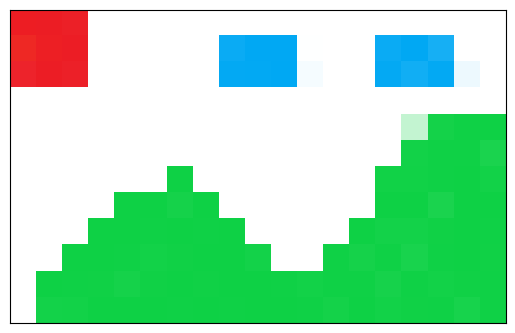

In [292]:
matrizExp1, arrayExp1 = obt_array_matrix(img_1, factor)
plt.imshow(matrizExp1, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [293]:
def fitness(array, cromosoma):
    return len(cromosoma) - euclidean_distance(array, cromosoma)

In [294]:
poblacion_inicial = pob_init(arrayExp1)

228.0


Operadores Geneticos utilizados:
* Seleccion Ranking
* Cruce Uniforme
* Mutacion Flit-bit

 Hiperparámetros:
 * Probabilidad de mutación = 0.97
 * Probabilidad de cruce = 0.1
 * Porcentaje de elitismo = 0

In [295]:
exp1 = AlgGenetico( poblacion_inicial, num_generaciones=generaciones, seleccion="ranking", cruce="uniforme", mutacion="flit_bit")
exp1.desarrollo_generaciones()

In [296]:
print("Analisis Estadistico\n")
exp1.analisis_est()

Analisis Estadistico

Datos estadisticos:
 Media: 15.684336135138143
 Mediana: 15.684336135138139
 Mínimo: 15.684336135138139
 Máximo: 15.684336135138139
 Desviación estándar: 3.552713678800501e-15
 Varianza: 1.262177448353619e-29

Información del computador:
 Sistema: Windows
 Versión: 10.0.19045
 Arquitectura: ('64bit', 'WindowsPE')
 Procesador: AMD64 Family 21 Model 101 Stepping 1, AuthenticAMD
 Memoria Total: 12293189632 bytes
 Memoria Disponible: 6942121984 bytes
 Porcentaje de Uso de Memoria: 43.5%

Tiempo total de ejecucion:
 -1700883073.8963459 segundos
 -28348051.231605764 minutos


Diagramas



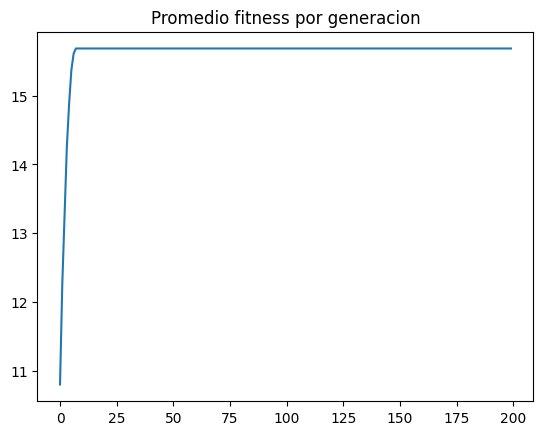

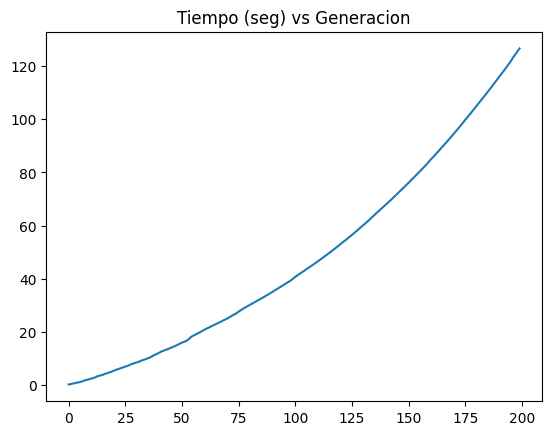

In [297]:
print("Diagramas\n")
exp1.diagramas()

In [298]:
len(arrayExp1)

684

In [299]:
len(exp1.poblacion)

628

In [309]:
def obtenerResult(exp1):
    result = []
    for i in exp1.poblacion:
        result.append(i.cromosoma[0])
        result.append(i.cromosoma[1])
        result.append(i.cromosoma[2])
    print(len(result))
    return np.array(result[:684])
#imgResultExp1 = obtener_el_mejor(exp1, matrizExp1)
imgResultExp1 = obtenerResult(exp1).reshape(matrizExp1.shape)
imgResult = (imgResultExp1 * factor) / 255.0
#imgResult.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\resultadoFinal.jpg')

1884


Resultado Final



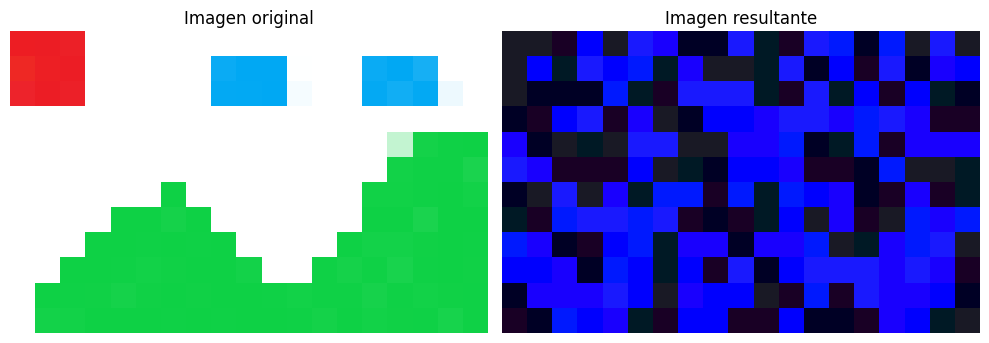

In [310]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(imgResult, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.show()

### Animacion

In [ ]:
ani1 = animation_result(matrizExp1, exp1, generaciones, factor)
ani1.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\animacion.gif', writer='pillow')

In [ ]:
#HTML(ani1.to_jshtml())
display.display(display.Image(filename="C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\animacion.gif"))